In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_data = pd.read_csv("Data/train.csv")
print(train_data.shape)
train_data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("Data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PassengerId is not gonna help us
Survived is the target class.
Pclass - ordinal variable
Name is not gonna help pin prediction
Sex - catagorical variable, need to convert into numrical value
Age - Numerical variable, need to normalise.
SibSp - Numerical variable, need to normalise.
Parch - Numerical variable, need to normalise.
Ticket - No use in prediction
Fare - Numeerical variable, need to normalise.
Cabin - Categorical variable, need to convert into numerical value.
Embarked - Categorical variable, need to convert into numerical value.

In [5]:
# Removing the unwanted columns

train_data.drop(columns=["PassengerId","Name","Ticket"], inplace = True)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
train_data.shape

(891, 9)

In [7]:
# Calculating the percentage of missing values

(train_data.isnull().sum()/train_data.shape[0])*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

Age has approximately 20% missing values. Either we can impute missing values using mean or by predicting using linear regression
Cabin has approximately 77% missing values. So we will drop it.
Embarked has approximately 0.2% missing values. We can impute that using mode

In [8]:
# dropping cabin column
train_data.drop(columns=["Cabin"], inplace = True)

# imputing missing values of embarked column
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode())

train_data = pd.get_dummies(train_data, dtype = float)

#imputing the missing values of Age using Linear Regression 

test = train_data[train_data["Age"].isnull()]   # test data where it contains rows in which age is missing
train_data.dropna(inplace = True)  # dropping rows in which age is missing

y_train = train_data["Age"]
X_train = train_data.drop("Age" , axis = 1)
X_test = test.drop("Age", axis = 1)

X_train





,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,5,29.1250,1.0,0.0,0.0,1.0,0.0
886,0,2,0,0,13.0000,0.0,1.0,0.0,0.0,1.0
887,1,1,0,0,30.0000,1.0,0.0,0.0,0.0,1.0
889,1,1,0,0,30.0000,0.0,1.0,1.0,0.0,0.0


In [9]:
#Function to calculate the cost
def compute_cost(X, y, W, b):
    m = X.shape[0]
    cost = 0
    
    for i in range(m):
        f_wb_i = np.dot(W, X.iloc[i]) + b
        cost += (f_wb_i-y.iloc[i])**2
    cost = cost/(2*m)
    
    return cost

#Function to calculate the gradient
def compute_gradient(X, y, W, b):
    m,n = X.shape           
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    for i in range(m):
        err = (np.dot(X.iloc[i], W) + b) - y.iloc[i] 
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X.iloc[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

#Function to run the gradient descent
def gradient_descent(num_iterations, compute_gradient, X, y, W_in, b_in, alpha, cost_function):
    
    J_history = []
    W = W_in
    b = b_in
    
    for i in range(num_iterations):
      
        dj_db, dj_dw = compute_gradient(X, y, W, b)
        
        W = W-alpha*dj_dw
        b = b-alpha*dj_db
        
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, W, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return W, b, J_history
        

# initialise parameters and training the model
W_in = np.zeros((X_train.shape[1]))
b_in = 0.

num_iterations = 5000
alpha = 12.0e-5

W_final, b_final, J_hist = gradient_descent(num_iterations, compute_gradient, X_train, y_train, W_in, b_in, alpha, compute_cost)

print(W_final, b_final)

#Function to predicting the age
def age_predict(W_final, b_final, X):
    m = X.shape[0]
    X_pred = np.zeros(m)
    for i in range(m):
        X_pred[i] = np.dot(X.iloc[i], W_final) + b_final
    
    return X_pred

# m = X_train.shape[0]

# diff = 0
# for i in range(m):
#     print(f"prediction: {np.dot(X_train.iloc[i], W_final) + b_final:0.2f}, target value: {y_train.iloc[i]}")
#     diff+= abs((np.dot(X_train.iloc[i], W_final) + b_final)-y_train.iloc[i])

# print(diff)



Iteration    0: Cost   434.56   
Iteration  500: Cost   259.87   
Iteration 1000: Cost   199.55   
Iteration 1500: Cost   171.55   
Iteration 2000: Cost   157.89   
Iteration 2500: Cost   150.66   
Iteration 3000: Cost   146.36   
Iteration 3500: Cost   143.44   
Iteration 4000: Cost   141.21   
Iteration 4500: Cost   139.35   
[ 1.11207256  6.39004281 -1.06814173 -0.48852564  0.12423661  0.97924847
  3.01903957  0.68595099  0.15875525  3.10636449] 3.998288040176234


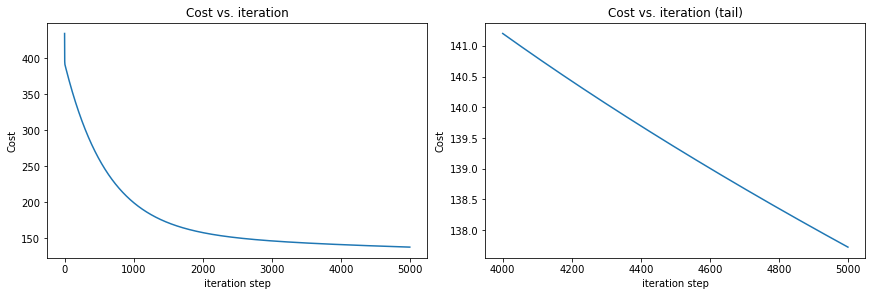

In [10]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(4000 + np.arange(len(J_hist[4000:])), J_hist[4000:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 

plt.show()

In [11]:
# Make predictions on the training set
y_train_pred = age_predict(W_final, b_final,X_train)

# Calculate Mean Absolute Error (MAE)
mae_train = np.mean(np.abs(y_train_pred - y_train))

# Calculate Mean Squared Error (MSE)
mse_train = np.mean((y_train_pred - y_train) ** 2)

# Calculate R-squared
ssr_train = np.sum((y_train_pred - np.mean(y_train)) ** 2)
sst_train = np.sum((y_train - np.mean(y_train)) ** 2)

r_squared_train = 1 - (ssr_train / sst_train)

print(f"Training MAE: {mae_train:.2f}")

print(f"Training MSE: {mse_train:.2f}")

print(f"Training R-squared: {r_squared_train:.2f}")

Training MAE: 12.84
Training MSE: 275.45
Training R-squared: 0.82


In [12]:
#predicting the missing values of age
m = X_test.shape[0]
y_predict = np.zeros((m, ))
for i in range(m):
    y_predict[i] = np.dot(X_test.iloc[i], W_final) + b_final
print(y_predict)

X_test["Age"] = y_predict
X_train["Age"] = y_train
X_test

[27.39704183 25.63092623 26.84329803 27.77101656 26.39737787 30.27476798
 30.30070883 26.3813265  28.88361092 27.85435448 30.29392526 27.20373704
 26.3813265  27.43047393 22.03620718 17.53725967 28.32289876 30.27476798
 30.29392526 26.38598537 30.29392526 30.29392526 30.27476798 31.37183276
 27.35066519 30.29392526 27.30904504 27.16674056 25.7506512  30.20230076
 30.37002019 28.41229172 21.93050436 19.73456906 28.76476621 26.37250062
 22.35312523 22.72556548 26.27601851 27.30904504 26.3813265  28.41229172
 26.24090331 30.27476798 26.72497511 28.19201586 25.56121504 26.27601851
 30.19453597 23.0051425  27.30904504 25.26925394 20.36506986 26.3813265
 22.90377773 19.74388681 17.53725967 21.41502412 26.3813265  28.21050161
 20.5627721  30.29392526 26.94136833 28.41229172 26.17071051 31.12209774
 30.27476798 29.29816971 20.86201631 27.77101656 26.39737787 26.39737787
 27.20373704 26.84381982 26.3813265  22.30608289 30.27476798 27.30646092
 26.72497511 30.27476798 27.19826325 22.90377773 28.

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age
5,0,3,0,0,8.4583,0.0,1.0,0.0,1.0,0.0,27.397042
17,1,2,0,0,13.0000,0.0,1.0,0.0,0.0,1.0,25.630926
19,1,3,0,0,7.2250,1.0,0.0,1.0,0.0,0.0,26.843298
26,0,3,0,0,7.2250,0.0,1.0,1.0,0.0,0.0,27.771017
28,1,3,0,0,7.8792,1.0,0.0,0.0,1.0,0.0,26.397378
...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,0,0,7.2292,0.0,1.0,1.0,0.0,0.0,27.771538
863,0,3,8,2,69.5500,1.0,0.0,0.0,0.0,1.0,26.372501
868,0,3,0,0,9.5000,0.0,1.0,0.0,0.0,1.0,30.474068
878,0,3,0,0,7.8958,0.0,1.0,0.0,0.0,1.0,30.274768


In [13]:
#merging two datasets
data_train = pd.concat([X_train, X_test], ignore_index=True)
data_train

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age
0,0,3,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,22.000000
1,1,1,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,38.000000
2,1,3,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,26.000000
3,1,1,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,35.000000
4,0,3,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,35.000000
...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,0,0,7.2292,0.0,1.0,1.0,0.0,0.0,27.771538
887,0,3,8,2,69.5500,1.0,0.0,0.0,0.0,1.0,26.372501
888,0,3,0,0,9.5000,0.0,1.0,0.0,0.0,1.0,30.474068
889,0,3,0,0,7.8958,0.0,1.0,0.0,0.0,1.0,30.274768


In [14]:
#Function to normalise the attributes
def normalise(X):
    mu = np.mean(X)
    sigma = np.std(X)
    X_norm = (X-mu)/sigma
    return X_norm

data_train["SibSp"] = normalise(data_train["SibSp"])
data_train["Parch"] = normalise(data_train["Parch"])
data_train["Fare"] = normalise(data_train["Fare"])
data_train["Age"] = normalise(data_train["Age"])

data_train

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age
0,0,3,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0,-0.547122
1,1,1,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0,0.669196
2,1,3,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0,-0.243043
3,1,1,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0,0.441136
4,0,3,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0,0.441136
...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,-0.474545,-0.473674,-0.502864,0.0,1.0,1.0,0.0,0.0,-0.108371
887,0,3,6.784163,2.008933,0.751946,1.0,0.0,0.0,0.0,1.0,-0.214725
888,0,3,-0.474545,-0.473674,-0.457142,0.0,1.0,0.0,0.0,1.0,0.097075
889,0,3,-0.474545,-0.473674,-0.489442,0.0,1.0,0.0,0.0,1.0,0.081925


In [15]:
data_train_y = data_train["Survived"]
data_train.drop(columns="Survived", inplace = True)
data_train


,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age
0,3,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0,-0.547122
1,1,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0,0.669196
2,3,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0,-0.243043
3,1,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0,0.441136
4,3,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0,0.441136
...,...,...,...,...,...,...,...,...,...,...
886,3,-0.474545,-0.473674,-0.502864,0.0,1.0,1.0,0.0,0.0,-0.108371
887,3,6.784163,2.008933,0.751946,1.0,0.0,0.0,0.0,1.0,-0.214725
888,3,-0.474545,-0.473674,-0.457142,0.0,1.0,0.0,0.0,1.0,0.097075
889,3,-0.474545,-0.473674,-0.489442,0.0,1.0,0.0,0.0,1.0,0.081925


In [16]:


# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Computing cost for logistic regression
def compute_cost_logistic(X, y, W, b):
    m = len(y)
    z = np.dot(X, W) + b
    f_wb = sigmoid(z)
    cost = -1/m * np.sum(y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb))
    return cost

# Function for finding the gradient
def compute_gradient_logistic(X, y, W, b):
    m = len(y)
    z = np.dot(X, W) + b
    f_wb = sigmoid(z)
    err = f_wb - y
    dj_dw = np.dot(X.T, err) / m
    dj_db = np.sum(err) / m
    return dj_dw, dj_db

# Calculating the gradient descent
def gradient_descent_logistic(num_iterations, X, y, W_in, b_in, alpha):
    J_history = []
    W = W_in
    b = b_in

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient_logistic(X, y, W, b)

        W = W - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        J_history.append(compute_cost_logistic(X, y, W, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {float(J_history[-1]):8.2f}")

    return W, b, J_history

# Initialize parameters and train the model
X_train, X_test, y_train, y_test = train_test_split(data_train, data_train_y, test_size=0.2, random_state=42)

W_in = np.zeros((X_train.shape[1]))
b_in = 0.
num_iterations = 5000
alpha = 0.01

W_final_l, b_final_l, J_hist = gradient_descent_logistic(num_iterations, X_train, y_train, W_in, b_in, alpha)

print(W_final_l, b_final_l)

# Predicting the probability of survival
def predict_probability(X, W, b):
    z = np.dot(X, W) + b
    return sigmoid(z)




Iteration    0: Cost     0.69
Iteration  500: Cost     0.53
Iteration 1000: Cost     0.49
Iteration 1500: Cost     0.48
Iteration 2000: Cost     0.47
Iteration 2500: Cost     0.46
Iteration 3000: Cost     0.46
Iteration 3500: Cost     0.46
Iteration 4000: Cost     0.46
Iteration 4500: Cost     0.45
[-0.60469444 -0.46355302 -0.07008936  0.36301538  1.56410987 -0.9314419
  0.36533451  0.10180238  0.12997936 -0.36828545] 0.6326679722167441


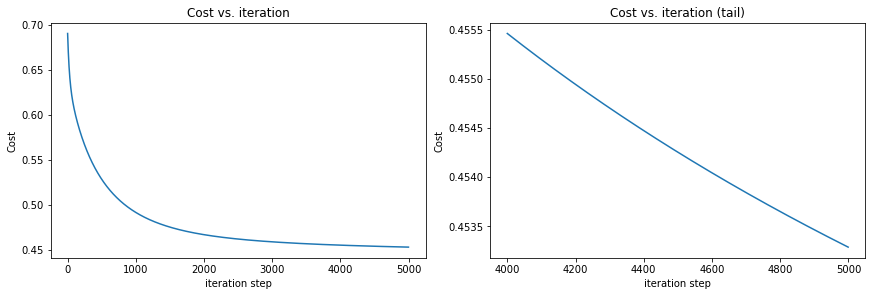

In [17]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(4000 + np.arange(len(J_hist[4000:])), J_hist[4000:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 

plt.show()

In [18]:

# Make predictions on the training set
y_train_predict_prob = predict_probability(X_train, W_final_l, b_final_l)
y_train_predict = (y_train_predict_prob >= 0.5).astype(int)

#Make predictions on test set
y_test_predict_prob = predict_probability(X_test, W_final_l, b_final_l)
y_test_predict = (y_test_predict_prob >= 0.5).astype(int)


#defining the accuracy function
def accuracy(y_pred, y_actual):
    n = len(y_actual)
    sum = 0
    for i in range(n):
        if(y_pred[i]==y_actual.iloc[i]):
            sum+=1
            
    return (sum/n)

train_acc = accuracy(y_train_predict, y_train)
test_acc = accuracy(y_test_predict, y_test)

print("Training Accuracy = ", train_acc)
print("Test Accuracy = ", test_acc)


Training Accuracy =  0.7935393258426966
Test Accuracy =  0.8044692737430168


In [19]:
#Now time for the test data

#Removing unnecessary columns from the test data

testing_data = test_data

test_data.drop(columns=["PassengerId","Name","Ticket","Cabin"], inplace = True)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [20]:
test_data.shape

(418, 7)

In [21]:
# Calculating the percentage of missing values

(test_data.isnull().sum())

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [22]:
# imputing missing values of fare column
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())
test_data = pd.get_dummies(test_data, dtype = float)
print(test_data.shape)
#imputing the missing values of Age using Linear Regression 

test = test_data[test_data["Age"].isnull()]   # test data where it contains rows in which age is missing
test_data.dropna(inplace = True)  # dropping rows in which age is missing
print(test_data.shape)

y_train = test_data["Age"]
X_train = test_data.drop("Age" , axis = 1)
X_test = test.drop("Age", axis = 1)

X_train

# initialise parameters and training the model
W_in = np.zeros((X_train.shape[1]))
b_in = 0.

num_iterations = 5000
alpha = 12.0e-5

W_final, b_final, J_hist = gradient_descent(num_iterations, compute_gradient, X_train, y_train, W_in, b_in, alpha, compute_cost)

print(W_final, b_final)

(418, 10)
(332, 10)
Iteration    0: Cost   368.18   
Iteration  500: Cost   230.95   
Iteration 1000: Cost   178.51   
Iteration 1500: Cost   153.28   
Iteration 2000: Cost   140.83   
Iteration 2500: Cost   134.40   
Iteration 3000: Cost   130.82   
Iteration 3500: Cost   128.59   
Iteration 4000: Cost   127.03   
Iteration 4500: Cost   125.80   
[ 6.13439981  0.11299577 -0.29134111  0.16116714  1.14590587  2.75430573
  1.08042479  0.36910286  2.45068394] 3.900211596984984


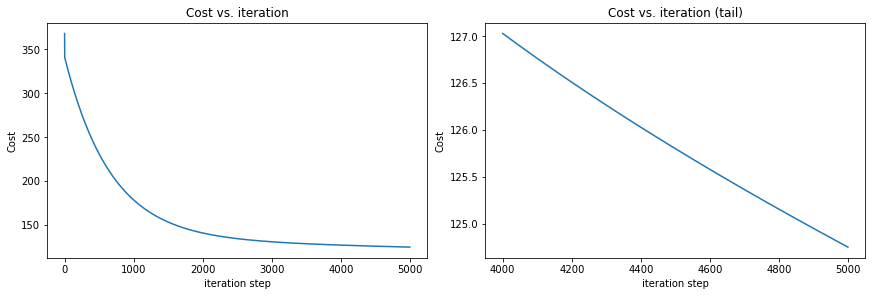

In [23]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(4000 + np.arange(len(J_hist[4000:])), J_hist[4000:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 

plt.show()

In [24]:
# Make predictions on the training set
y_train_pred = age_predict(W_final, b_final,X_train)

# Calculate Mean Absolute Error (MAE)
mae_train = np.mean(np.abs(y_train_pred - y_train))

# Calculate Mean Squared Error (MSE)
mse_train = np.mean((y_train_pred - y_train) ** 2)

# Calculate R-squared
ssr_train = np.sum((y_train_pred - np.mean(y_train)) ** 2)
sst_train = np.sum((y_train - np.mean(y_train)) ** 2)

r_squared_train = 1 - (ssr_train / sst_train)

print(f"Training MAE: {mae_train:.2f}")

print(f"Training MSE: {mse_train:.2f}")

print(f"Training R-squared: {r_squared_train:.2f}")

Training MAE: 11.97
Training MSE: 249.50
Training R-squared: 0.66


In [25]:
#predicting the missing values of age
m = X_test.shape[0]
y_predict = np.zeros((m, ))
for i in range(m):
    y_predict[i] = np.dot(X_test.iloc[i], W_final) + b_final
print(y_predict)

X_test["Age"] = y_predict
X_train["Age"] = y_train
X_test


[28.78094418 18.73750802 29.85810772 29.20968379 27.1973963  36.61366712
 19.5185886  26.67586494 22.51459682 30.2161874  23.15011093 28.80579616
 28.78094418 21.01824587 28.58067937 25.06746508 28.76147519 28.80579616
 26.67586494 26.67586494 28.91256939 25.07217116 27.175655   26.78886071
 26.67586494 27.79154727 28.83903157 27.28865077 23.5981318  19.5185886
 27.41068503 25.06477359 28.63657066 16.72862408 28.72521259 27.30325102
 26.67586494 37.43045928 19.42994668 27.20746925 26.3165104  18.01805805
 28.64462902 25.08828787 28.80579616 26.40418143 25.06746508 26.69668773
 28.7796065  30.81808365 26.97227951 28.72521259 26.67586494 28.78094418
 15.23960108 28.72521259 27.1973963  26.67586494 26.42950618 27.30257412
 25.06746508 28.67686245 27.30325102 28.80579616 21.62181976 27.30325102
 29.85810772 22.42863027 25.06746508 28.72924177 27.30257412 27.30325102
 36.20850097 29.66697886 28.77826881 26.67586494 34.60010111 28.58134015
 26.67586494 28.23692434 23.44902779 25.062759   25.

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age
10,3,0,0,7.8958,0.0,1.0,0.0,0.0,1.0,28.780944
22,1,0,0,31.6833,1.0,0.0,0.0,0.0,1.0,18.737508
29,3,2,0,21.6792,0.0,1.0,1.0,0.0,0.0,29.858108
33,3,1,2,23.4500,1.0,0.0,0.0,0.0,1.0,29.209684
36,3,0,0,8.0500,1.0,0.0,0.0,0.0,1.0,27.197396
...,...,...,...,...,...,...,...,...,...,...
408,3,0,0,7.7208,1.0,0.0,0.0,1.0,0.0,25.062759
410,3,0,0,7.7500,1.0,0.0,0.0,1.0,0.0,25.067465
413,3,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,28.805796
416,3,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,28.805796


In [26]:
#merging two datasets
data_train = pd.concat([X_train, X_test], ignore_index=True)
data_train

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age
0,3,0,0,7.8292,0.0,1.0,0.0,1.0,0.0,34.500000
1,3,1,0,7.0000,1.0,0.0,0.0,0.0,1.0,47.000000
2,2,0,0,9.6875,0.0,1.0,0.0,1.0,0.0,62.000000
3,3,0,0,8.6625,0.0,1.0,0.0,0.0,1.0,27.000000
4,3,1,1,12.2875,1.0,0.0,0.0,0.0,1.0,22.000000
...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,7.7208,1.0,0.0,0.0,1.0,0.0,25.062759
414,3,0,0,7.7500,1.0,0.0,0.0,1.0,0.0,25.067465
415,3,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,28.805796
416,3,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,28.805796


In [27]:
#Function to normalise the attributes
def normalise(X):
    mu = np.mean(X)
    sigma = np.std(X)
    X_norm = (X-mu)/sigma
    return X_norm

data_train["SibSp"] = normalise(data_train["SibSp"])
data_train["Parch"] = normalise(data_train["Parch"])
data_train["Fare"] = normalise(data_train["Fare"])
data_train["Age"] = normalise(data_train["Age"])

data_train

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age
0,3,-0.499470,-0.400248,-0.498407,0.0,1.0,0.0,1.0,0.0,0.385030
1,3,0.616992,-0.400248,-0.513274,1.0,0.0,0.0,0.0,1.0,1.360879
2,2,-0.499470,-0.400248,-0.465088,0.0,1.0,0.0,1.0,0.0,2.531898
3,3,-0.499470,-0.400248,-0.483466,0.0,1.0,0.0,0.0,1.0,-0.200479
4,3,0.616992,0.619896,-0.418471,1.0,0.0,0.0,0.0,1.0,-0.590819
...,...,...,...,...,...,...,...,...,...,...
413,3,-0.499470,-0.400248,-0.500351,1.0,0.0,0.0,1.0,0.0,-0.351716
414,3,-0.499470,-0.400248,-0.499827,1.0,0.0,0.0,1.0,0.0,-0.351348
415,3,-0.499470,-0.400248,-0.494448,0.0,1.0,0.0,0.0,1.0,-0.059504
416,3,-0.499470,-0.400248,-0.494448,0.0,1.0,0.0,0.0,1.0,-0.059504


In [28]:

result = pd.DataFrame(columns = ['PassengerId', 'Survived'])
test_data_raw = pd.read_csv("Data/test.csv")
result['PassengerId'] = test_data_raw['PassengerId']

y_test_predict_prob = predict_probability(data_train, W_final_l, b_final_l)

y_test_prediction = (y_test_predict_prob >= 0.5).astype(int)


result['Survived'] = y_test_prediction

result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,0


In [29]:
result.to_csv('Submissions/submission_scratch.csv', index=False)